<a href="https://colab.research.google.com/github/Abhinash200301/Machine---Learning---Project---5/blob/main/Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please provide the input path of the image


/content/freezer_image (1).jpg


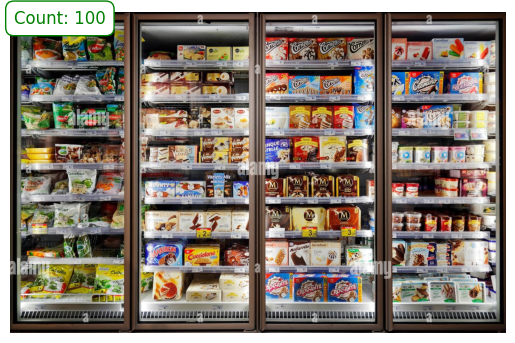

In [3]:
import cv2
import torch
from torchvision import transforms
from torchvision.models.detection import maskrcnn_resnet50_fpn
import matplotlib.pyplot as plt

# Load pre-trained Mask R-CNN model
model = maskrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Load and preprocess the image
def load_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_tensor = transforms.ToTensor()(image)
    image_tensor = image_tensor.unsqueeze(0)
    return image, image_tensor

# Perform object detection
def detect_objects(image_tensor):
    with torch.no_grad():
        predictions = model(image_tensor)
    return predictions[0]

# Count the number of items
def count_items(predictions):
    return len(predictions['boxes'])

# Display the count on the image
def display_count(image, count):
    plt.imshow(image)
    plt.axis('off')
    plt.text(10, 30, f"Count: {count}", color='green', fontsize=12, bbox=dict(facecolor='white', edgecolor='green', boxstyle='round,pad=0.5'))
    plt.show()

print("Please provide the input path of the image")

print('\n')

image_path = input()

# Load and preprocess the image
image, image_tensor = load_image(image_path)

# Perform object detection
predictions = detect_objects(image_tensor)

# Count the number of items
item_count = count_items(predictions)

# Display the count on the image
display_count(image, item_count)